<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Initial-Visualizations" data-toc-modified-id="Initial-Visualizations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Visualizations</a></span><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Set Up</a></span><ul class="toc-item"><li><span><a href="#Imports-and-Functions" data-toc-modified-id="Imports-and-Functions-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Imports and Functions</a></span></li><li><span><a href="#Isolating-Areas-of-Interest" data-toc-modified-id="Isolating-Areas-of-Interest-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Isolating Areas of Interest</a></span></li></ul></li><li><span><a href="#Existing-Rooftop-Solar-Installations" data-toc-modified-id="Existing-Rooftop-Solar-Installations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Existing Rooftop Solar Installations</a></span><ul class="toc-item"><li><span><a href="#Basic-Metrics-Bar-Plots" data-toc-modified-id="Basic-Metrics-Bar-Plots-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Basic Metrics Bar Plots</a></span></li><li><span><a href="#Maps" data-toc-modified-id="Maps-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Maps</a></span></li></ul></li><li><span><a href="#Solar-Potential" data-toc-modified-id="Solar-Potential-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Solar Potential</a></span><ul class="toc-item"><li><span><a href="#How-the-Towns-Compare-Overall" data-toc-modified-id="How-the-Towns-Compare-Overall-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>How the Towns Compare Overall</a></span></li><li><span><a href="#Adding-a-Rooftop-Layer" data-toc-modified-id="Adding-a-Rooftop-Layer-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Adding a Rooftop Layer</a></span></li></ul></li></ul></li></ul></div>

## Background

## Initial Visualizations

### Set Up

#### Imports and Functions

In [1]:
# Define functions for data & viz output locations

def dataDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/data/' + x

def outputDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/output/' + x

In [2]:
# Import libraries

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
# import rioxarray as rxr                  # contextlib error
from rasterstats import zonal_stats
from rasterio import open as r_open
from rasterio.plot import show as r_show 
from subprocess import Popen
# from qgis import processing

%matplotlib inline

#### Isolating Areas of Interest

In [3]:
# Read MA zip codes shape file

zipsMA = gpd.read_file(dataDir('MAshape/ZIPCODES_NT_POLY.shp'))
zipsMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
0,01331,ATHOL,NON UNIQUE,ATHOL,02515,"ATHOL, TOWN OF",WORCESTER,58.084870,1.504391e+08,66459.581259,"POLYGON ((147583.601 930766.133, 147572.846 93..."
1,01085,WESTFIELD,NON UNIQUE,WESTFIELD,76030,WESTFIELD,HAMPDEN,55.938928,1.448812e+08,61329.577100,"POLYGON ((101952.244 882113.238, 101989.263 88..."
2,01370,SHELBURNE FALLS,NON UNIQUE,SHELBURNE FALLS,61205,"SHELBURNE, TOWN OF",FRANKLIN,48.804057,1.264019e+08,70885.011312,"POLYGON ((107090.967 933358.562, 106787.233 93..."
3,01235,HINSDALE,NON UNIQUE,HINSDALE,30280,"HINSDALE, TOWN OF",BERKSHIRE,47.757052,1.236902e+08,49286.404925,"POLYGON ((77728.642 914027.911, 77229.987 9120..."
4,02747,NORTH DARTMOUTH,NON UNIQUE,NORTH DARTMOUTH,47450,"DARTMOUTH, TOWN OF",BRISTOL,47.495414,1.230126e+08,66614.835420,"POLYGON ((242894.990 830521.900, 242901.505 83..."
...,...,...,...,...,...,...,...,...,...,...,...
544,01107,SPRINGFIELD,NON UNIQUE,SPRINGFIELD,67000,SPRINGFIELD,HAMPDEN,1.498634,3.881445e+06,10376.718676,"POLYGON ((107846.667 873744.759, 107748.271 87..."
545,02143,SOMERVILLE,NON UNIQUE,SOMERVILLE,62535,SOMERVILLE,MIDDLESEX,1.496683,3.876392e+06,10257.447499,"POLYGON ((234515.542 903600.882, 234513.546 90..."
546,02126,MATTAPAN,NON UNIQUE,MATTAPAN,07000,BOSTON,SUFFOLK,1.913063,4.954811e+06,11393.855139,"POLYGON ((235583.548 891243.299, 235517.614 89..."
547,02723,FALL RIVER,NON UNIQUE,FALL RIVER,23000,FALL RIVER,BRISTOL,1.848472,4.787521e+06,10099.578308,"POLYGON ((231623.910 825614.571, 231616.540 82..."


In [4]:
zipsMA[zipsMA['CITY_TOWN'].eq('NEWTON')]  # .plot()

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.098405,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.132747,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.748247,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.394419,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.388591,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."
500,02464,NEWTON UPPER FALLS,NON UNIQUE,NEWTON UPPER FALLS,45700,NEWTON,MIDDLESEX,0.483483,1.252216e+06,4882.759558,"POLYGON ((223342.938 895175.220, 223320.651 89..."
536,02467,CHESTNUT HILL,NON UNIQUE,CHESTNUT HILL,13625,NEWTON,MIDDLESEX,1.621331,4.199229e+06,14621.378876,"MULTIPOLYGON (((227304.795 899167.144, 227347...."
541,02458,NEWTON,NON UNIQUE,NEWTON,45560,NEWTON,MIDDLESEX,1.970416,5.103354e+06,13327.104521,"POLYGON ((225353.521 901672.403, 225337.127 90..."
543,02468,WABAN,NON UNIQUE,WABAN,72075,NEWTON,MIDDLESEX,1.498875,3.882068e+06,11514.626247,"POLYGON ((223329.306 898537.458, 223318.615 89..."


In [6]:
# Isolate Newton, Milton, Hyde Park, and West Roxbury

isolMA = zipsMA.loc[(zipsMA['PC_NAME'].isin(['MILTON', 'HYDE PARK', 'WEST ROXBURY'])) |
                   (zipsMA['CITY_TOWN'].eq('NEWTON'))]
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.098405,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.005897,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.132747,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.748247,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.394419,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.388591,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


<AxesSubplot:>

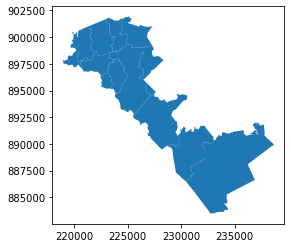

In [8]:
# Plot the areas

isolMA.plot()

In [7]:
# Create unions of the multiple polygons in Newton, Hyde Park, and Milton

milton1 = isolMA.loc[310, 'geometry'][0]
milton2 = isolMA.loc[310, 'geometry'][1]

polyNewton = gpd.GeoDataFrame(geometry=isolMA[isolMA['CITY_TOWN'].eq('NEWTON')]['geometry'])
polyMilton = gpd.GeoDataFrame(geometry=[milton1, milton2])
polyHP     = gpd.GeoDataFrame(geometry=isolMA[isolMA['PC_NAME'].eq('HYDE PARK')]['geometry'])

polyNewton = polyNewton.set_index(pd.Index([i for i in range(len(polyNewton))]))
polyMilton = polyMilton.set_index(pd.Index([0, 1]))
polyHP     = polyHP.set_index(pd.Index([0, 1]))

polyNewton = polyNewton['geometry']
polyMilton = polyMilton['geometry']
polyHP     = polyHP['geometry']

In [8]:
def polyUnion(polyList):
    
    res = polyList.loc[0]
    
    for i in range(1, len(polyList)):
        res = res.union(polyList.loc[i])
        
    return res

In [9]:
newtonAll = polyUnion(polyNewton)
newton    = ['02456', 'NEWTON', 'AGG', 'NEWTON', 'NA', 'NEWTON', 'MIDDLESEX', 
            'NA', newtonAll.area, newtonAll.length, newtonAll]


isolMA.loc[0] = newton
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [10]:
miltonAll = polyUnion(polyMilton)
milton    = ['02186', 'MILTON', 'AGG', 'NEWTON', 'NA', 'MILTON, TOWN OF', 
             'NORFOLK', 'NA', miltonAll.area, miltonAll.length, miltonAll]


isolMA.loc[1] = milton
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [11]:
hydeAll = polyUnion(polyHP)
hyde    = ['02136', 'HYDE PARK', 'AGG', 'HYDE PARK', 'NA', 'BOSTON', 'SUFFOLK', 
            'NA', hydeAll.area, hydeAll.length, hydeAll]


isolMA.loc[2] = hyde
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [12]:
isolMA = isolMA.drop([185, 210, 310, 381, 446, 450, 454, 462, 495, 500, 536, 541, 543])

In [13]:
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
0,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
1,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
2,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


### Existing Rooftop Solar Installations

In [27]:
# Read the data into pandas (source: Massachusetts Clean Energy Center)

existPV = pd.read_csv(dataDir('existingPV/existingPVStudyLocations.csv'))
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh
0,11.16,03/08/21,33850.00,0.0,Newton,2465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0
1,5.52,02/23/21,28648.80,0.0,Newton,2460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0
2,6.21,02/23/21,18925.25,0.0,Newton,2466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0
3,6.64,02/23/21,26988.00,0.0,Newton,2459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0
4,12.96,02/22/21,42666.00,0.0,Newton,2468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0
1037,5.64,02/28/12,28679.00,8500.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0
1038,7.05,11/30/11,39835.00,4250.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0
1039,2.52,05/30/07,22653.00,6300.0,Boston,2132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0


In [28]:
# Need to append '0' to each zipcode entry

existPV['zip'] = '0' + existPV['zip'].astype(str)
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh
0,11.16,03/08/21,33850.00,0.0,Newton,02465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0
1,5.52,02/23/21,28648.80,0.0,Newton,02460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0
2,6.21,02/23/21,18925.25,0.0,Newton,02466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0
3,6.64,02/23/21,26988.00,0.0,Newton,02459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0
4,12.96,02/22/21,42666.00,0.0,Newton,02468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0
1037,5.64,02/28/12,28679.00,8500.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0
1038,7.05,11/30/11,39835.00,4250.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0
1039,2.52,05/30/07,22653.00,6300.0,Boston,02132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0


In [29]:
existPV.columns

Index(['capacity_kWDC', 'dateInService', 'totalCostwDesignFees', 'totalGrant',
       'city', 'zip', 'county', 'programName', 'facilityType', 'utility',
       '3rdPartyOwned', 'SREC_eligible', 'estAnnualProduction_kWh'],
      dtype='object')

In [30]:
# Some installations received state grants or other incentives, 
# reducing the final cost to the household

existPV['finalCost'] = existPV['totalCostwDesignFees'] - existPV['totalGrant']
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh,finalCost
0,11.16,03/08/21,33850.00,0.0,Newton,02465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0,33850.00
1,5.52,02/23/21,28648.80,0.0,Newton,02460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0,28648.80
2,6.21,02/23/21,18925.25,0.0,Newton,02466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0,18925.25
3,6.64,02/23/21,26988.00,0.0,Newton,02459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0,26988.00
4,12.96,02/22/21,42666.00,0.0,Newton,02468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0,42666.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0,22889.00
1037,5.64,02/28/12,28679.00,8500.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0,20179.00
1038,7.05,11/30/11,39835.00,4250.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0,35585.00
1039,2.52,05/30/07,22653.00,6300.0,Boston,02132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0,16353.00


In [31]:
def extract_exist_PV_PC_name(data, PCName):
    
    solarTown = data[data['city'] == PCName]
    
    # Metrics for graphing
    
    N            = len(solarTown)
    sumkWcap     = sum(solarTown['capacity_kWDC'])
    sumListCost  = sum(solarTown['totalCostwDesignFees'])
    avgListCost  = solarTown['totalCostwDesignFees'].mean()
    sumGrant     = sum(solarTown['totalGrant'])
    avgGrant     = solarTown['totalGrant'].mean()
    sumFinalCost = sum(solarTown['finalCost'])
    avgFinalCost = solarTown['finalCost'].mean()
    sumkWhProd   = sum(solarTown['estAnnualProduction_kWh'])
    
    return( {'N': N,
             'sumkWcap': round(sumkWcap, 2),
             'sumListCost': round(sumListCost, 2),
             'avgListCost': round(avgListCost, 2),
             'sumGrant': round(sumGrant, 2),
             'avgGrant': round(avgGrant, 2),
             'sumFinalCost': round(sumFinalCost, 2),
             'avgFinalCost': round(avgFinalCost, 2),
             'sumkWhProd': round(sumkWhProd, 2)
            })

In [32]:
def extract_exist_PV_zip(data, zipcode):
    
    solarZip = data[data['zip'] == zipcode]
    
    # Metrics for graphing
    
    N            = len(solarZip)
    sumkWcap     = sum(solarZip['capacity_kWDC'])
    sumListCost  = sum(solarZip['totalCostwDesignFees'])
    avgListCost  = solarZip['totalCostwDesignFees'].mean()
    sumGrant     = sum(solarZip['totalGrant'])
    avgGrant     = solarZip['totalGrant'].mean()
    sumFinalCost = sum(solarZip['finalCost'])
    avgFinalCost = solarZip['finalCost'].mean()
    sumkWhProd   = sum(solarZip['estAnnualProduction_kWh'])
    
    return( {'N': N,
             'sumkWcap': round(sumkWcap, 2),
             'sumListCost': round(sumListCost, 2),
             'avgListCost': round(avgListCost, 2),
             'sumGrant': round(sumGrant, 2),
             'avgGrant': round(avgGrant, 2),
             'sumFinalCost': round(sumFinalCost, 2),
             'avgFinalCost': round(avgFinalCost, 2),
             'sumkWhProd': round(sumkWhProd, 2)
            })

In [33]:
# Extract the solar units already installed in Newton and Milton

PVN = extract_exist_PV_PC_name(existPV, 'Newton')
PVM = extract_exist_PV_PC_name(existPV, 'Milton')

# Extract the solar units already installed in West Roxbury and Hyde Park

PVW = extract_exist_PV_zip(existPV, '02132')
PVH = extract_exist_PV_zip(existPV, '02136')

# Combine these into a dataframe & set the index correctly

existPVSummary = pd.DataFrame.from_dict([PVN, PVM, PVW, PVH])
existPVSummary = existPVSummary.set_index(pd.Index(['Newton', 'Milton', 
                                                    'West Roxbury', 
                                                    'Hyde Park']))
existPVSummary

,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
Newton,643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96
Milton,186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
West Roxbury,135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Hyde Park,77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82


In [34]:
# Save to a CSV

existPVSummary.to_csv(outputDir('existingPVSummary.csv'))

#### Basic Metrics Bar Plots

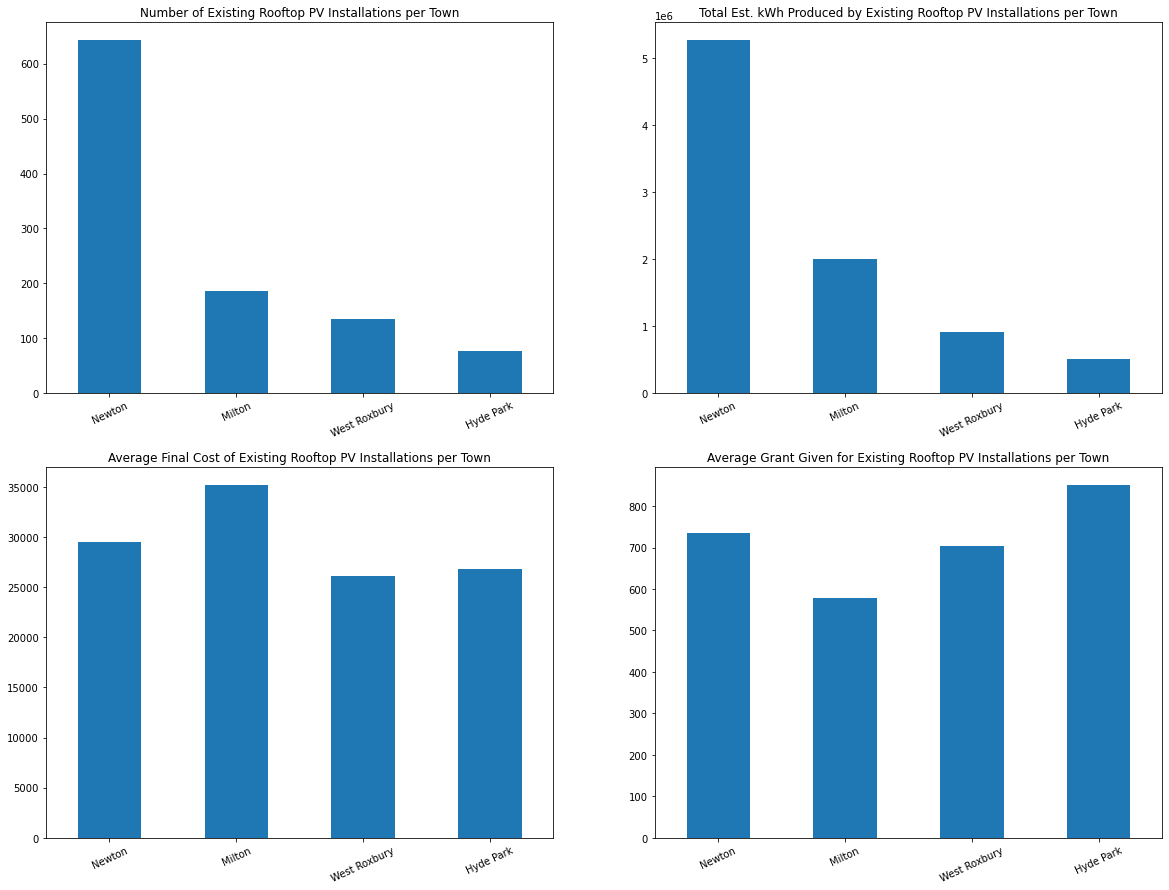

In [39]:
fig1, ax1 = plt.subplots(2, 2)
fig1.set_size_inches(20, 15)

# Plotting N per town

existPVSummary['N'].plot(kind='bar', ax=ax1[0][0])
ax1[0][0].set_xticklabels(labels=ax1[0][0].get_xticklabels(), rotation=25)
ax1[0][0].set_title('Number of Existing Rooftop PV Installations per Town')

# Plotting sumkWhProd per town

existPVSummary['sumkWhProd'].plot(kind='bar', ax=ax1[0][1])
ax1[0][1].set_xticklabels(labels=ax1[0][1].get_xticklabels(), rotation=25)
ax1[0][1].set_title('Total Est. kWh Produced by Existing Rooftop PV Installations per Town')

# Plotting avgFinalCost per town

existPVSummary['avgFinalCost'].plot(kind='bar', ax=ax1[1][0])
ax1[1][0].set_xticklabels(labels=ax1[1][0].get_xticklabels(), rotation=25)
ax1[1][0].set_title('Average Final Cost of Existing Rooftop PV Installations per Town')

# Plotting avgGrant per town

existPVSummary['avgGrant'].plot(kind='bar', ax=ax1[1][1])
ax1[1][1].set_xticklabels(labels=ax1[1][1].get_xticklabels(), rotation=25)
ax1[1][1].set_title('Average Grant Given for Existing Rooftop PV Installations per Town')

# Save image

plt.savefig(outputDir('viz/existingPVBars.png'), dpi=150, format='png')

# *********************** TODO: add bar labels? ******************************

#### Maps

In [26]:
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
0,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
1,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
2,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [27]:
isolMA = isolMA.set_index(pd.Index(['West Roxbury', 'Newton', 'Milton',
                                    'Hyde Park']))
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
West Roxbury,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
Newton,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
Milton,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
Hyde Park,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [28]:
# Don't need some of these columns to merge with existPVSummary

isolMA = isolMA[['CITY_TOWN', 'COUNTY', 'SHAPE_AREA', 
                       'SHAPE_LEN', 'geometry']]
isolMA

,CITY_TOWN,COUNTY,SHAPE_AREA,SHAPE_LEN,geometry
West Roxbury,BOSTON,SUFFOLK,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
Newton,NEWTON,MIDDLESEX,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
Milton,"MILTON, TOWN OF",NORFOLK,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
Hyde Park,BOSTON,SUFFOLK,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [29]:
isolMA.to_file(dataDir('MAshape/isolMA.shp'))

In [30]:
townsPV = isolMA.join(existPVSummary)
townsPV

,CITY_TOWN,COUNTY,SHAPE_AREA,SHAPE_LEN,geometry,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
West Roxbury,BOSTON,SUFFOLK,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89...",135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Newton,NEWTON,MIDDLESEX,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89...",643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96
Milton,"MILTON, TOWN OF",NORFOLK,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132....",186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
Hyde Park,BOSTON,SUFFOLK,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89...",77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82


In [ ]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8, 8)

townsPV.plot(ax=ax2, color='None', edgecolor='black')
townsPV.plot('N', ax=ax2, cmap='Blues', legend=True)

# Town labels
ax2.text(226000, 901650, 'Newton')
ax2.text(228000, 895000, 'West Roxbury')
ax2.text(230000, 892000, 'Hyde Park')
ax2.text(234500, 891700, 'Milton')

ax2.set_title('Number of Existing PV Installations by Town')

# Save image
plt.savefig(outputDir('viz/existPVNumMap.png'), dpi=150, format='png')

In [ ]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches(8, 8)

townsPV.plot(ax=ax3, color='None', edgecolor='black')
townsPV.plot('sumkWhProd', ax=ax3, cmap='Blues', legend=True)

# Town labels
ax3.text(226000, 901650, 'Newton')
ax3.text(228000, 895000, 'West Roxbury')
ax3.text(230000, 892000, 'Hyde Park')
ax3.text(234500, 891700, 'Milton')

ax3.set_title('Est. kWh Produced by Existing PV Installations in Each Town')

# Save image
plt.savefig(outputDir('viz/existPVkWhMap.png'), dpi=150, format='png')

### Solar Potential

#### How the Towns Compare Overall

In [14]:
isolMA.crs = 'EPSG:26986'

In [15]:
solarshp = isolMA.to_crs('EPSG:4326')           # solar data is in EPSG:4326 
solarshp.to_file(dataDir('MAshape/solar.shp'))  # saving this to use in QGIS

In [17]:
from_filepath = dataDir('irradiation/USA_GISdata_GlobalSolarAtlas/western-hemisphere/GHI.tif')
to_filepath   = dataDir('irradiation/USA_GISdata_GlobalSolarAtlas/western-hemisphere/reprojSolar.tif')

command = ['gdalwarp', 
           '-r', 'average',
            '-te', '-71.300', '42.170', '-71.000', '42.375',
           '-te_srs', 'EPSG:4326',
           '-of', 'GTiff',
           from_filepath, to_filepath]

Popen(command).wait()

0

In [18]:
solar_file = r_open(to_filepath)
solar = solar_file.read(1).astype(np.float32)

extent = [solar_file.bounds[i] for i in [0, 2, 1, 3]]

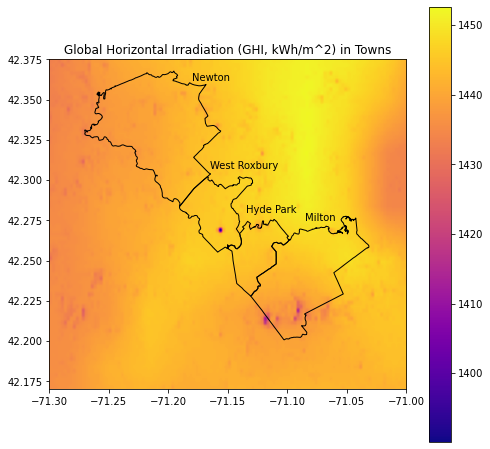

In [24]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches(8, 8)

img = ax4.imshow(solar, extent=extent, cmap='plasma')
plt.colorbar(img)

solarshp.plot(ax=ax4, color='None', edgecolor='black')

# Town labels
ax4.text(-71.180, 42.362, 'Newton')
ax4.text(-71.165, 42.307, 'West Roxbury')
ax4.text(-71.135, 42.280, 'Hyde Park')
ax4.text(-71.085, 42.275, 'Milton')

ax4.set_title('Global Horizontal Irradiation (GHI, kWh/m^2) in Towns')

# Save image
plt.savefig(outputDir('viz/GHItowns.png'), dpi=150, format='png')

#### Adding a Rooftop Layer

In [25]:
roofsBoston = gpd.read_file(dataDir('roofprintsBoston/structures_poly_35.shp'))
roofsMilton = gpd.read_file(dataDir('roofprintsMilton/structures_poly_189.shp'))
roofsNewton = gpd.read_file(dataDir('roofprintsNewton/structures_poly_207.shp'))

In [ ]:
roofsBoston

In [ ]:
roofsBoston.plot()

In [42]:
# Need to isolate just the rooftops in West Roxbury and Hyde Park
# TEMPORARY - while unable to replicate QGIS command in Python:

roofsWRHP   = gpd.read_file(dataDir('intersections/roofprintsWRHP.shp')).to_crs('EPSG:4326')
roofsNewton = gpd.read_file(dataDir('intersections/roofsprintsNewton.shp')).to_crs('EPSG:4326')
roofsMilton = gpd.read_file(dataDir('intersections/roofprintsMilton.shp')).to_crs('EPSG:4326')

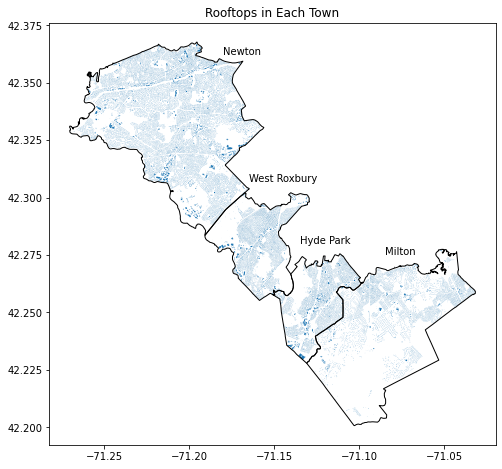

In [51]:
fig5, ax5 = plt.subplots()
fig5.set_size_inches(8, 8)

roofsWRHP.plot(ax=ax5)
roofsNewton.plot(ax=ax5)
roofsMilton.plot(ax=ax5)
solarshp.plot(ax=ax5, color='None', edgecolor='black')

# Town labels
ax5.text(-71.180, 42.362, 'Newton')
ax5.text(-71.165, 42.307, 'West Roxbury')
ax5.text(-71.135, 42.280, 'Hyde Park')
ax5.text(-71.085, 42.275, 'Milton')

ax5.set_title('Rooftops in Each Town')

# Save image
plt.savefig(outputDir('viz/roofs.png'), dpi=150, format='png')

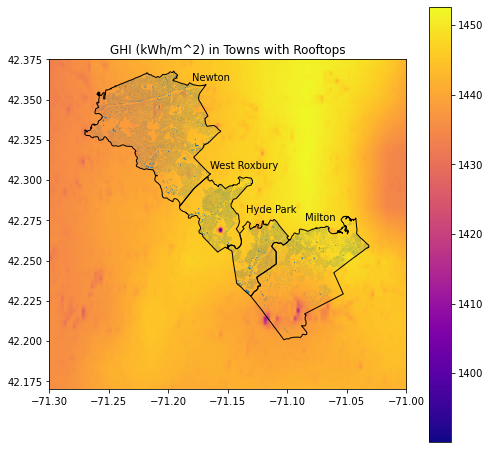

In [52]:
fig6, ax6 = plt.subplots()
fig6.set_size_inches(8, 8)

img = ax6.imshow(solar, extent=extent, cmap='plasma')
plt.colorbar(img)

roofsWRHP.plot(ax=ax6)
roofsNewton.plot(ax=ax6)
roofsMilton.plot(ax=ax6)
solarshp.plot(ax=ax6, color='None', edgecolor='black')

# Town labels
ax6.text(-71.180, 42.362, 'Newton')
ax6.text(-71.165, 42.307, 'West Roxbury')
ax6.text(-71.135, 42.280, 'Hyde Park')
ax6.text(-71.085, 42.275, 'Milton')

ax6.set_title('GHI (kWh/m^2) in Towns with Rooftops')

# Save image
plt.savefig(outputDir('viz/GHItownsRoofs.png'), dpi=150, format='png')

In [ ]:
# TODO: 
#   1. Rewrite README w/ new solar data
#   2. Graph rooftops in a neutral (not blue) color
#   3. plot $ per kWh produced?
#   4. remove axes from maps?